In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy.io
from scipy.signal import lfilter,butter,filtfilt
import itertools
from scipy.stats import pearsonr
from scipy.signal import welch
#import seaborn as sns

In [14]:
nic=scipy.io.loadmat('CircuitROIsMTS/LMP_NIC_12_FP_mean_denoisedTS.mat')
data = nic['mts'].T
print(data.shape)

(29, 3890)


In [15]:
roinames = nic["roi_names"].flatten()
for name in roinames:
    print(name[0])

ACC
L_Acb
L_Amygdala
L_Amygdala_CM_Juelich50
L_Amygdala_LB_Juelich50_minus_intersect
L_Amygdala_SF_Juelich50
L_Caudate
L_FOrb
L_Hipp
L_Insula
L_MidFG
L_Pallidum
L_Putamen
L_SN_Hammersn30r83_74
L_Thalamus
R_Acb
R_Amygdala
R_Amygdala_CM_Juelich50
R_Amygdala_LB_Juelich50_minus_intersect
R_Amygdala_SF_Juelich50
R_Caudate
R_FOrb
R_Hipp
R_Insula
R_MidFG
R_Pallidum
R_Putamen
R_SN_Hammersn30r83_75
R_Thalamus


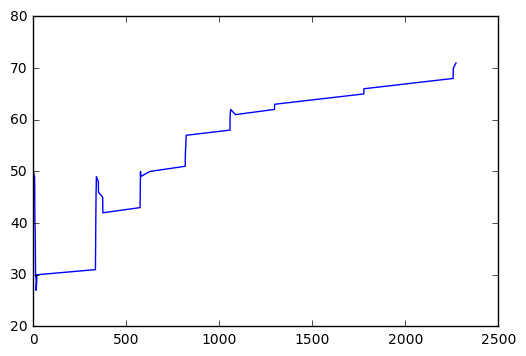

In [16]:
nict = scipy.io.loadmat('CircuitROIsMTS/LMP_NIC_12-FP/10-Apr-2017_09-57_LMP_NIC_12_FP.mat')
craving = nict['craveUpdate']
crav_t=(craving[0][0][0].T).flatten()
crav_v=(craving[0][0][1].T).flatten()
plt.plot(crav_t,crav_v)

In [17]:
# create a 10th order Butterworth filter from 0.01 to 0.1 Hz
def butter_bandpass(lowcut,highcut,fs,order=8):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq

    b,a = butter(order, [low, high], btype='band')
    return b,a

def butter_bandpass_filter(data,lowcut,highcut,fs,order=5):
    b,a = butter_bandpass(lowcut,highcut,fs,order=order)
    return filtfilt(b,a,data)

# create a 10th order Butterworth filter from 0.01 to 0.1 Hz
def butter_lowpass(lowcut,fs,order=8):
    nyq = 0.5*fs
    low = lowcut/nyq

    b,a = butter(order, low, btype='low')
    return b,a

def butter_lowpass_filter(data,lowcut,fs,order=5):
    b,a = butter_lowpass(lowcut,fs,order=order)
    return filtfilt(b,a,data)

sampling_freq = 1/0.802
print(sampling_freq)

1.2468827930174562


[ 316  556  796 1036 1276 1516 1756 1996 2236 2476]


/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


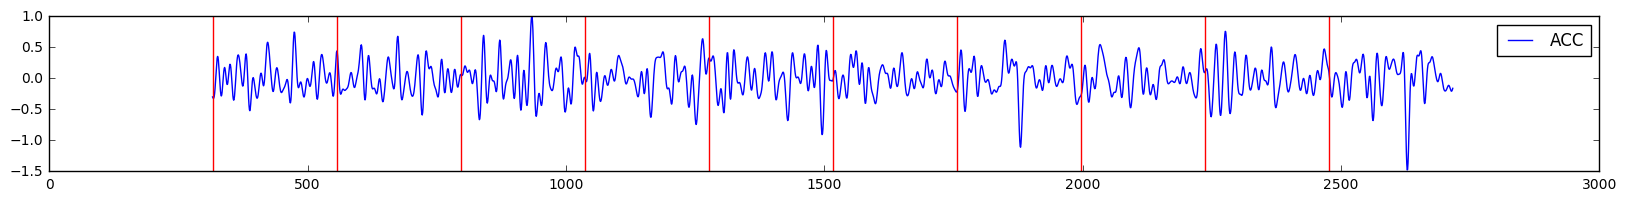

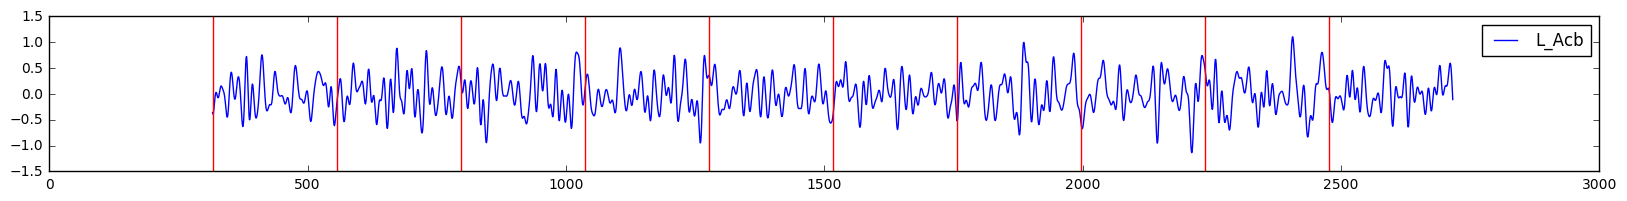

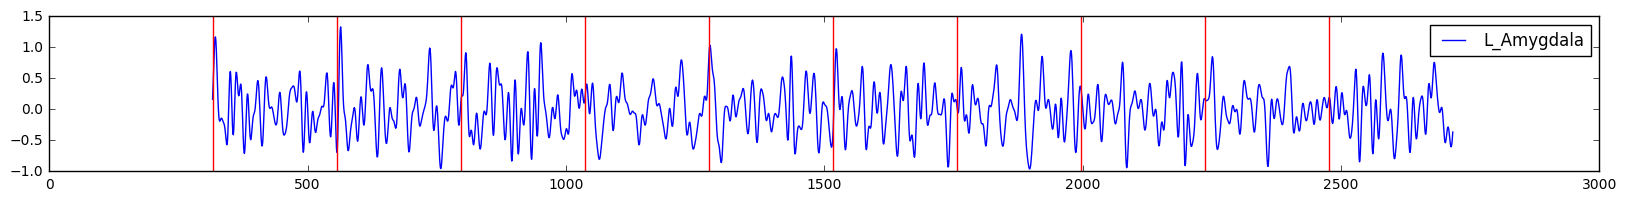

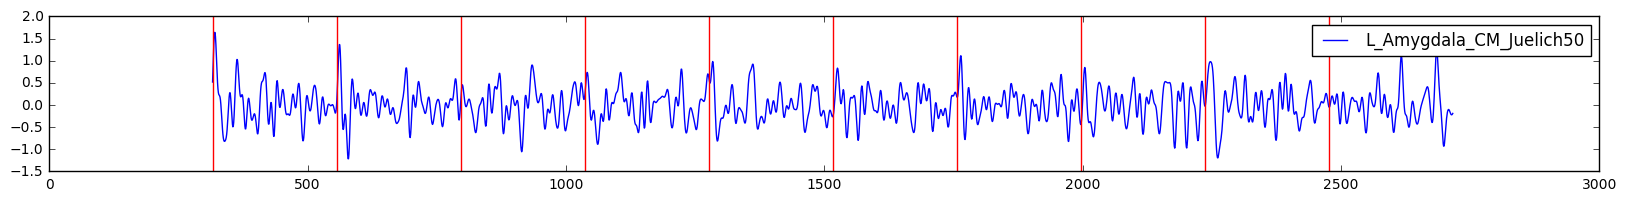

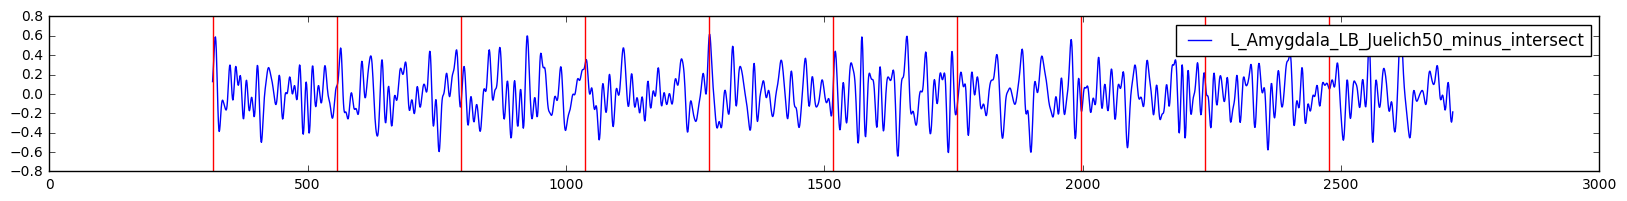

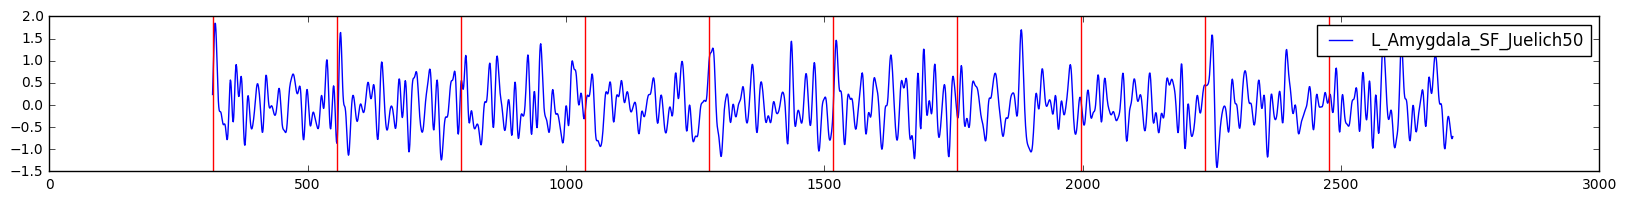

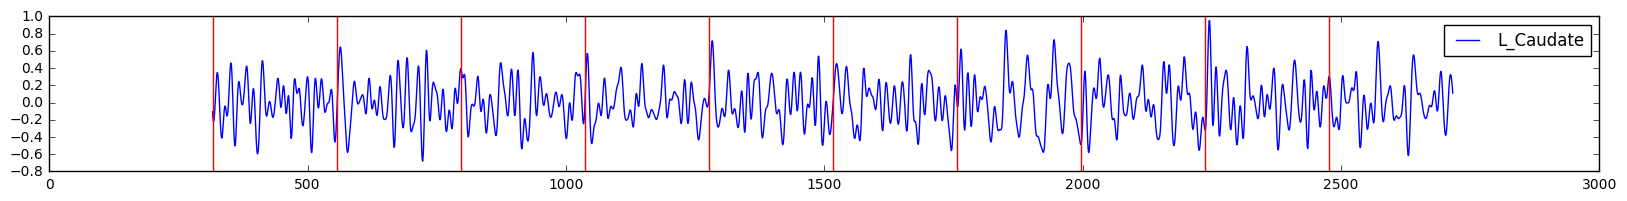

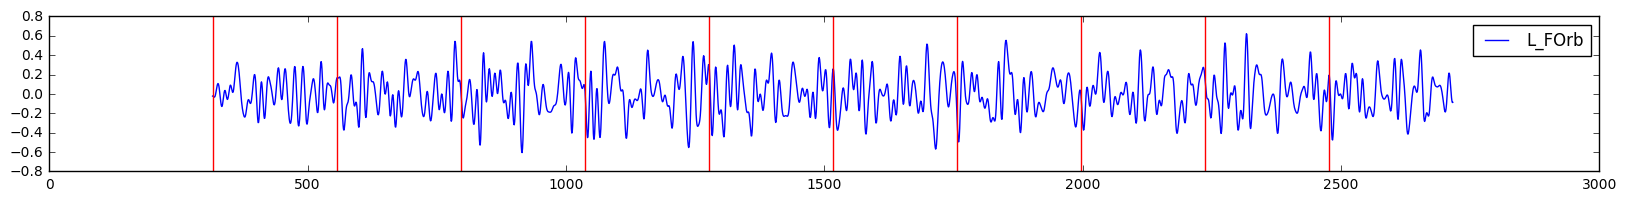

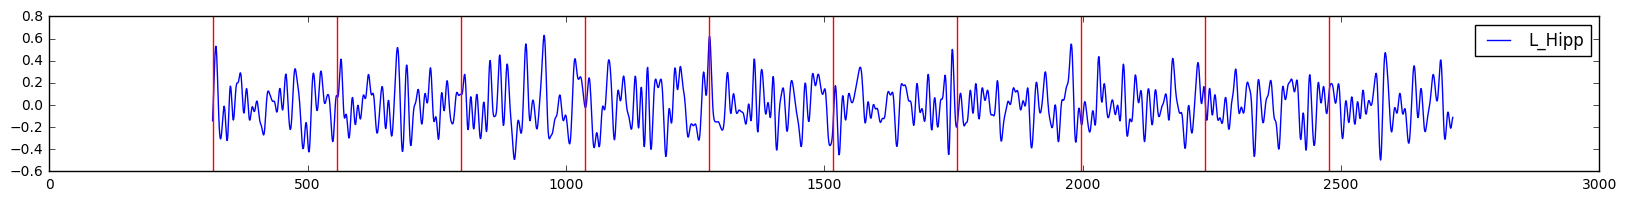

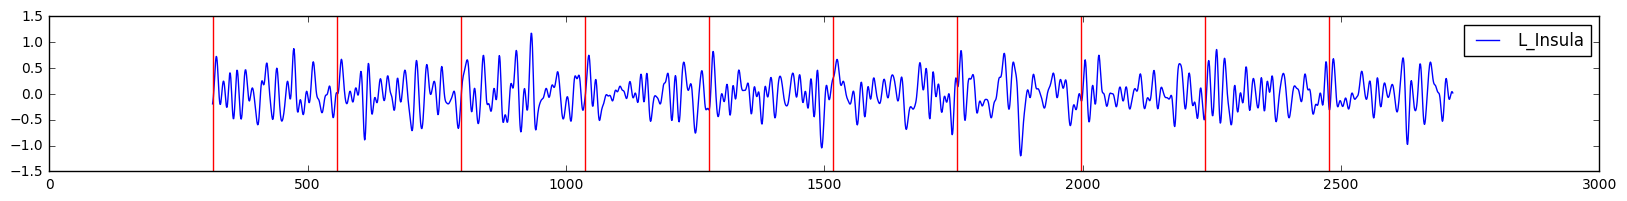

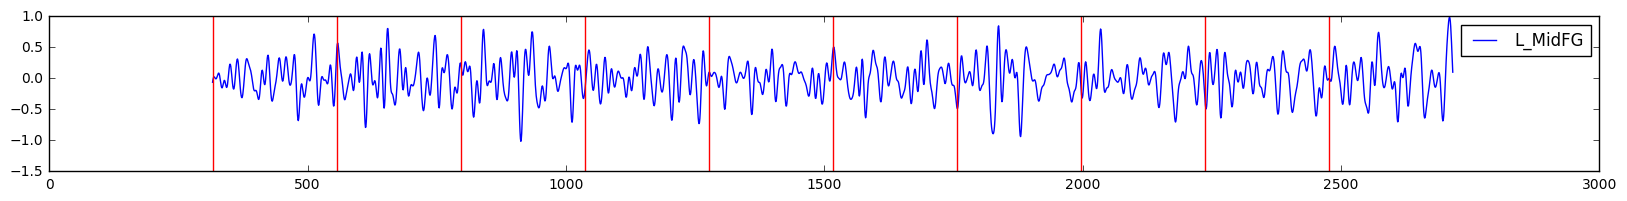

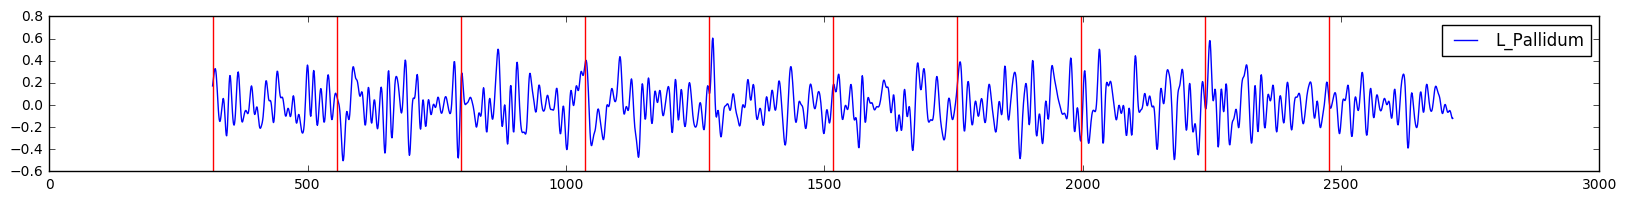

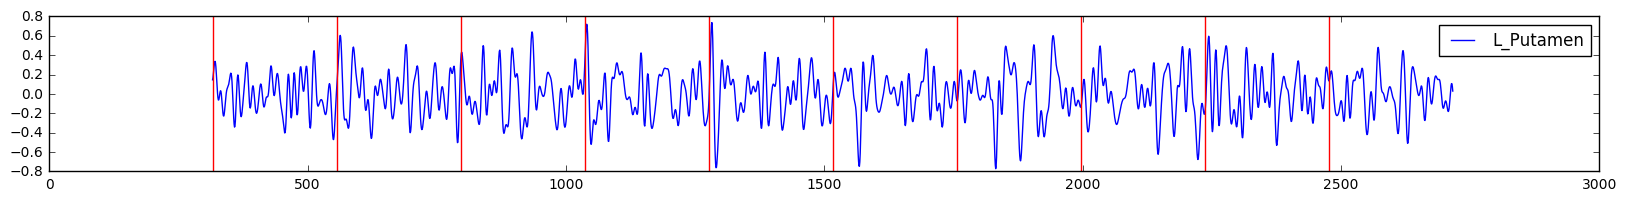

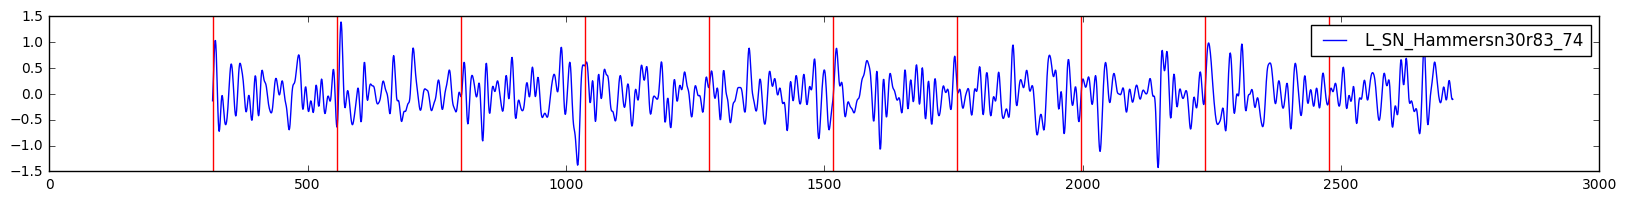

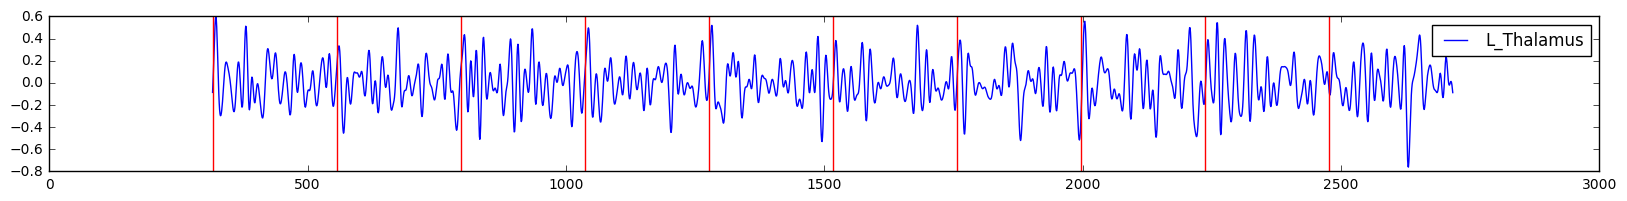

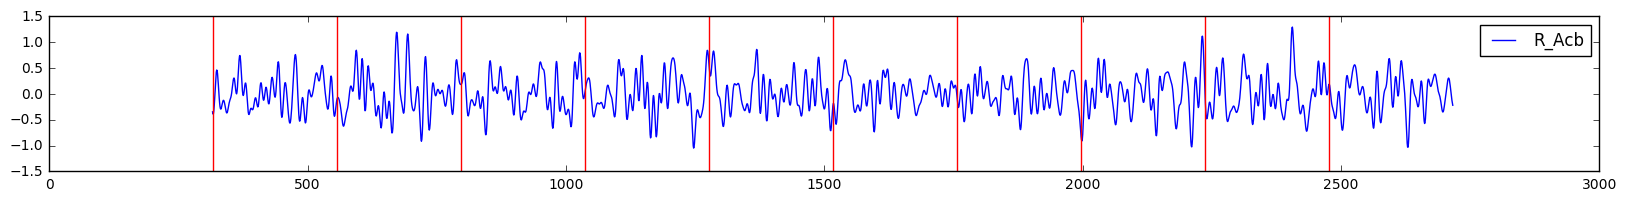

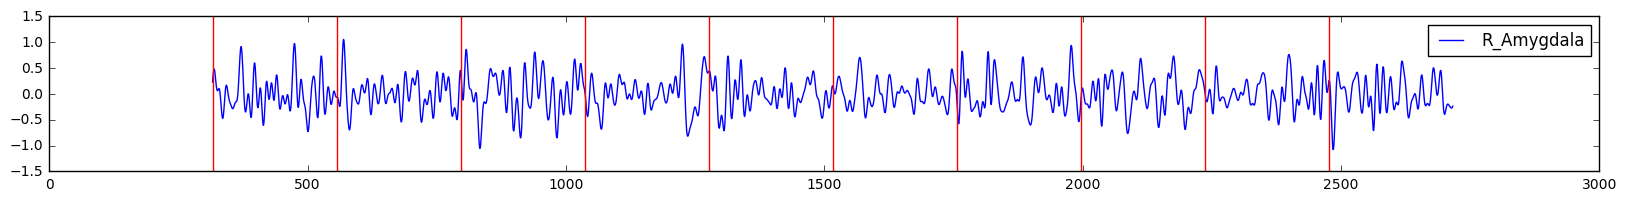

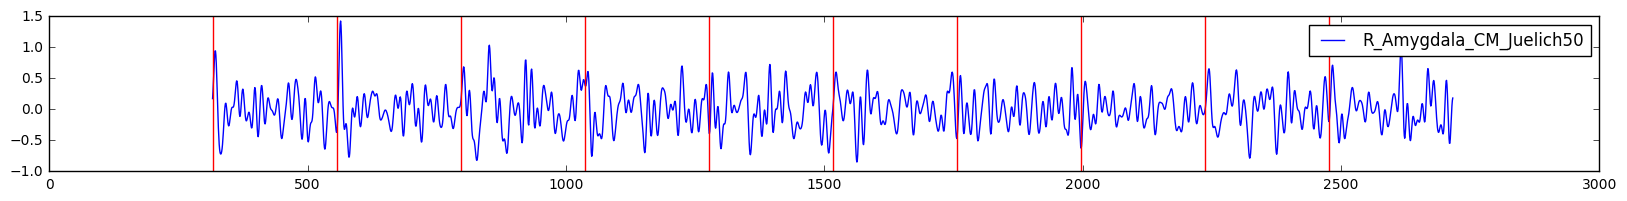

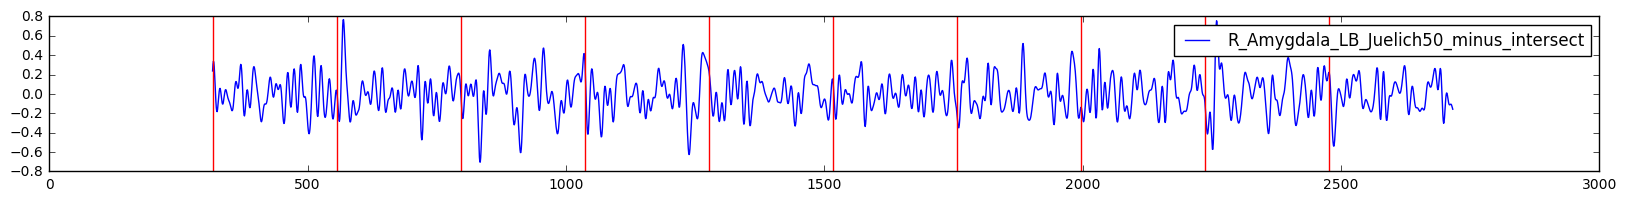

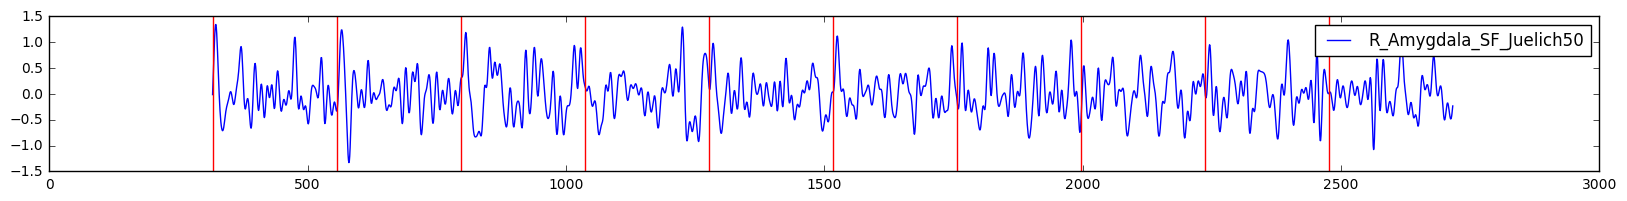

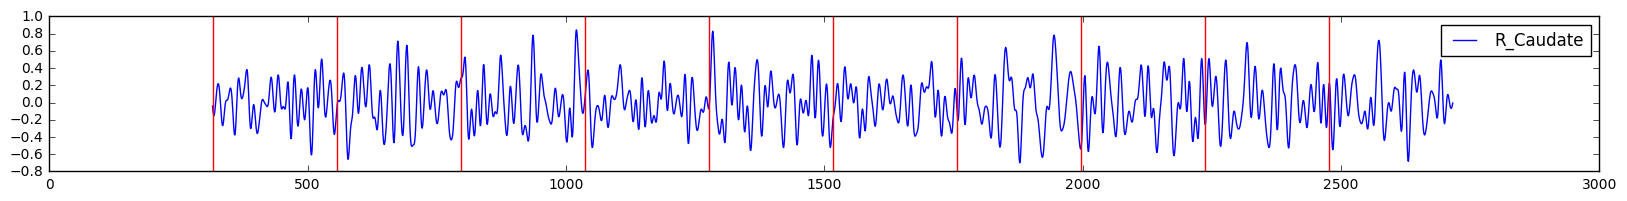

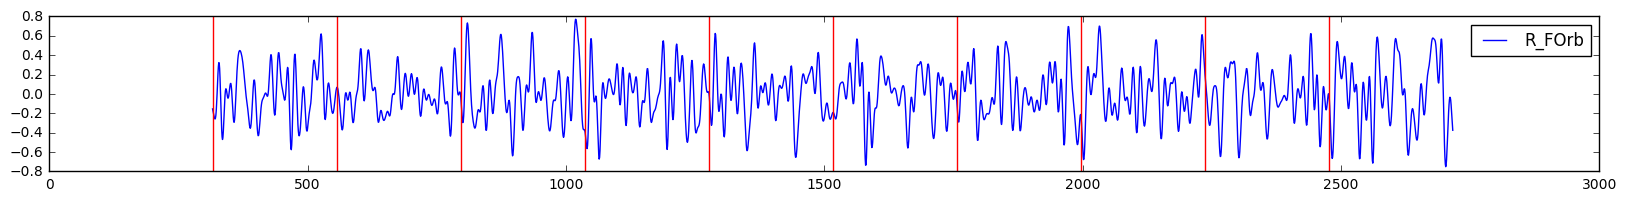

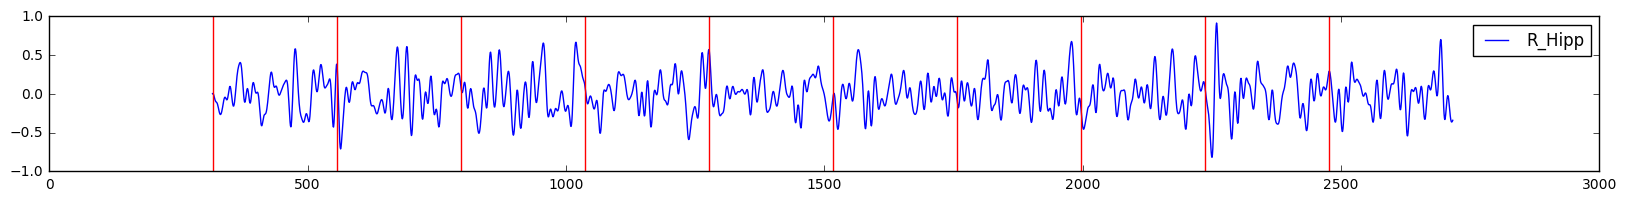

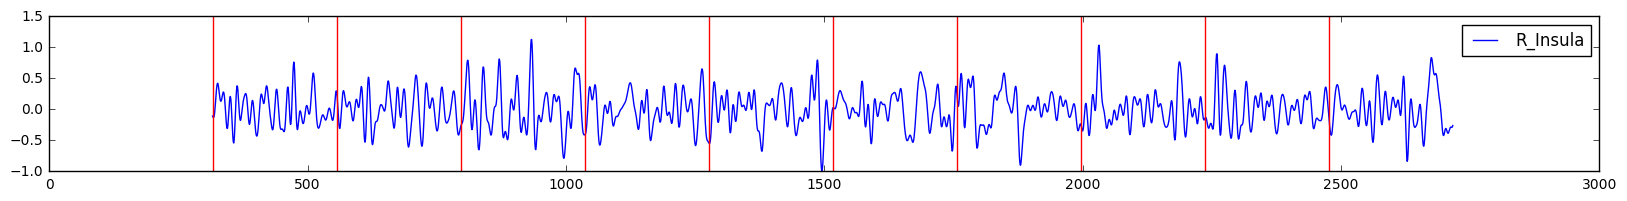

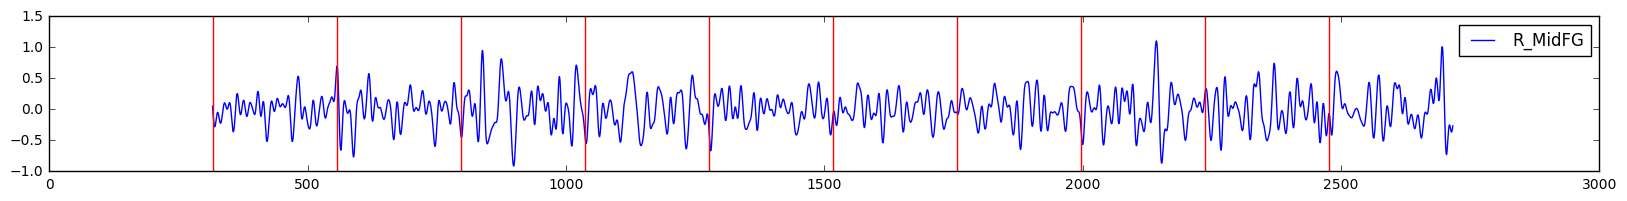

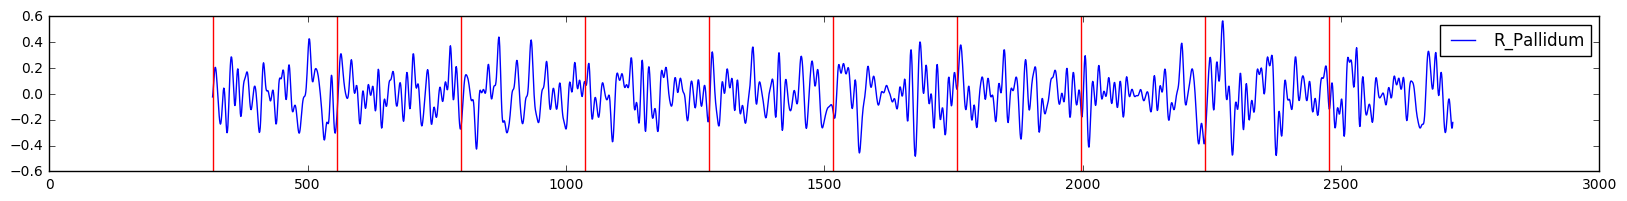

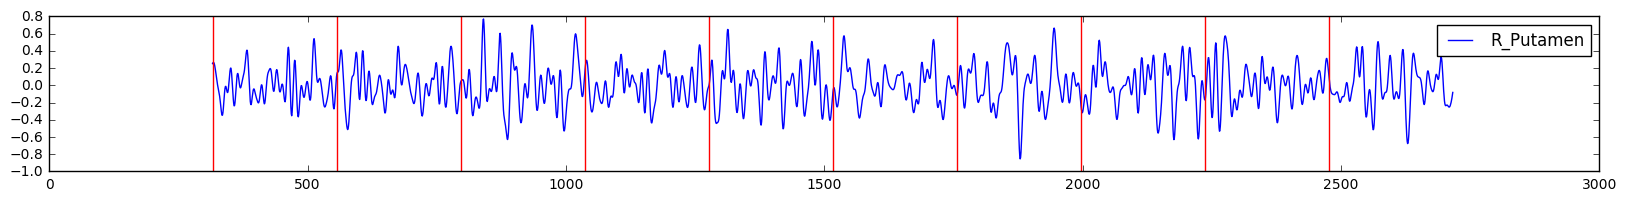

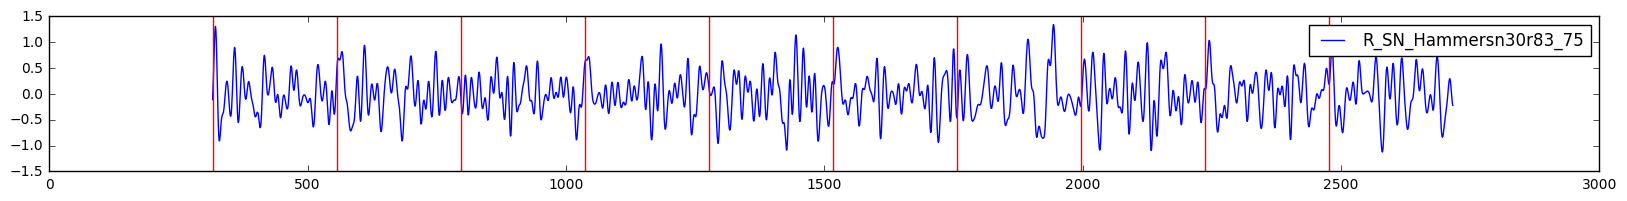

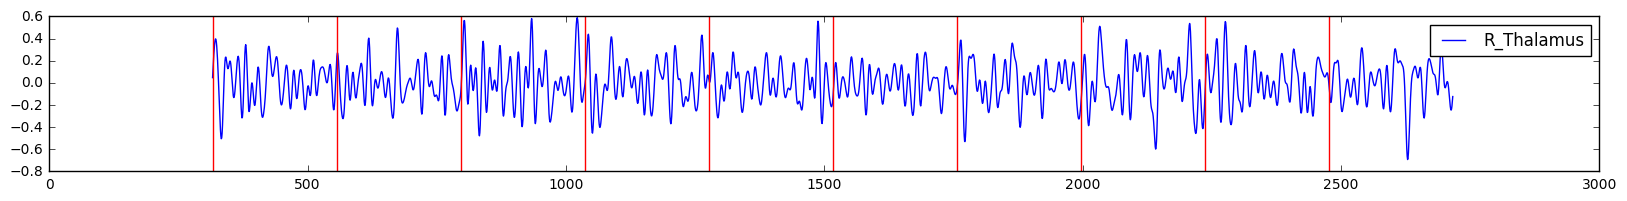

In [18]:
# comment about the indexing:
# the puffs start at second 316 and then happen every 4min = 240sec
# 316/0.802 = 394
# 2400/0.802 = 2992.52
t = np.linspace(0,3889*.802,3890)
data_filtered = None
puffs=np.arange(316,2500,240)
print(puffs)
for trace,name in zip(data,roinames):
    trace_filtered = butter_bandpass_filter(trace,0.01,0.1,sampling_freq,order=5)
    plt.figure(figsize=(20,2))
    plt.plot(t[394:394+2994],trace_filtered[394:394+2994],label=name[0])
#    plt.xlim((0,1000))
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()
    if data_filtered is None:
        data_filtered = trace_filtered
    else:
        data_filtered = np.vstack((data_filtered,trace_filtered))

In [19]:
data_filtered.shape

(29, 3890)

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


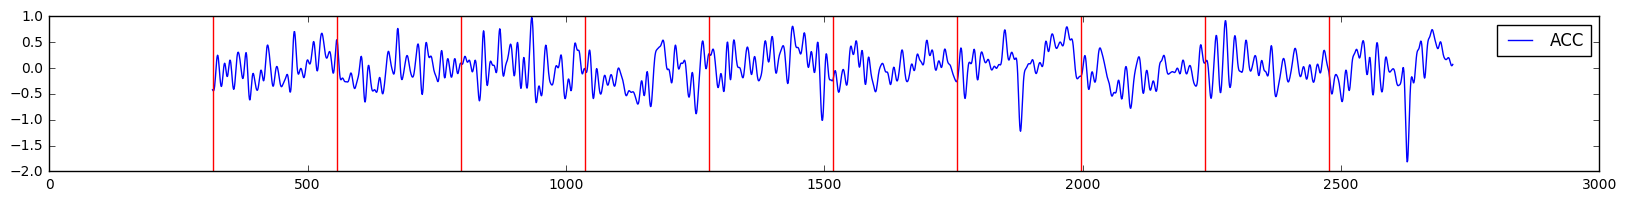

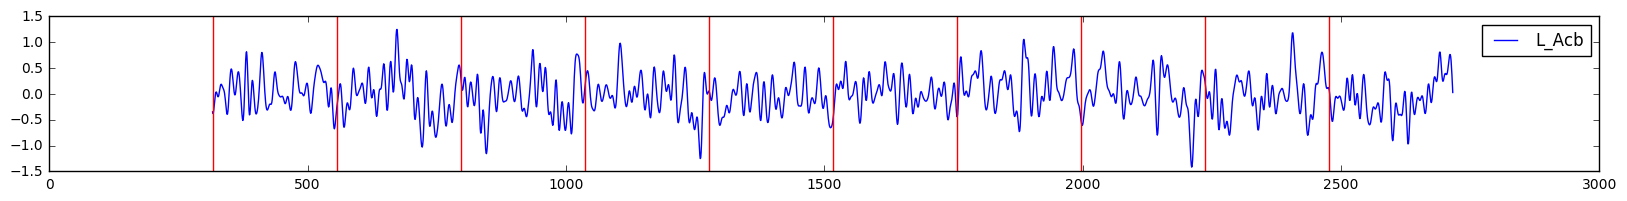

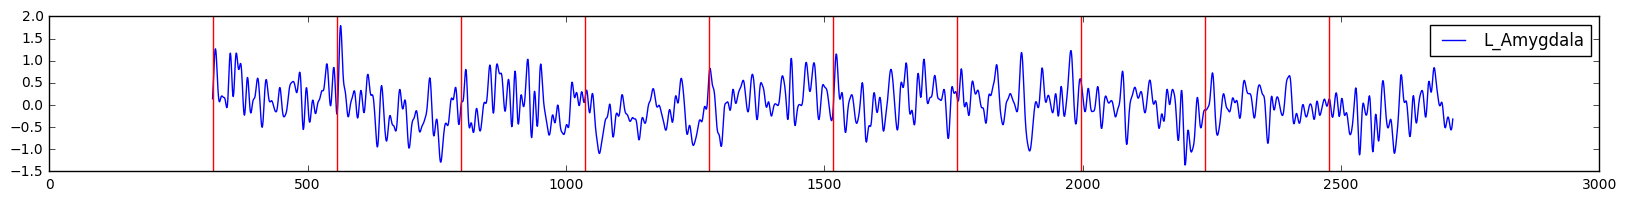

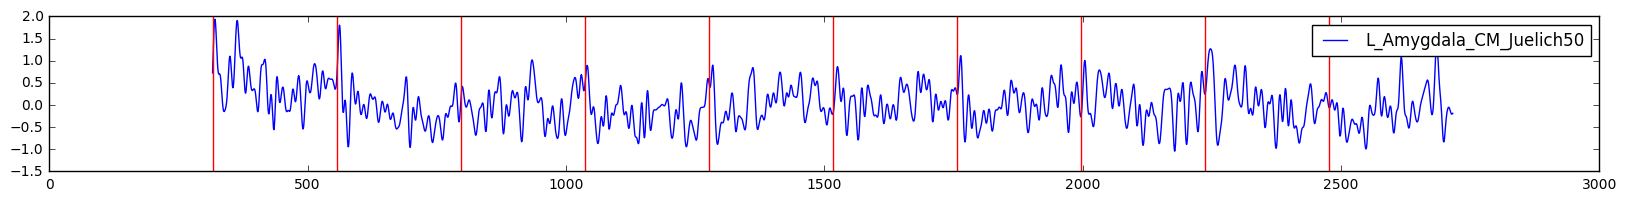

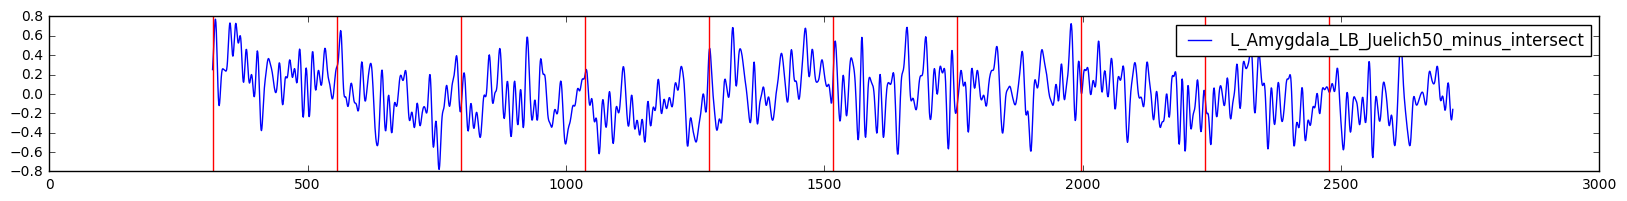

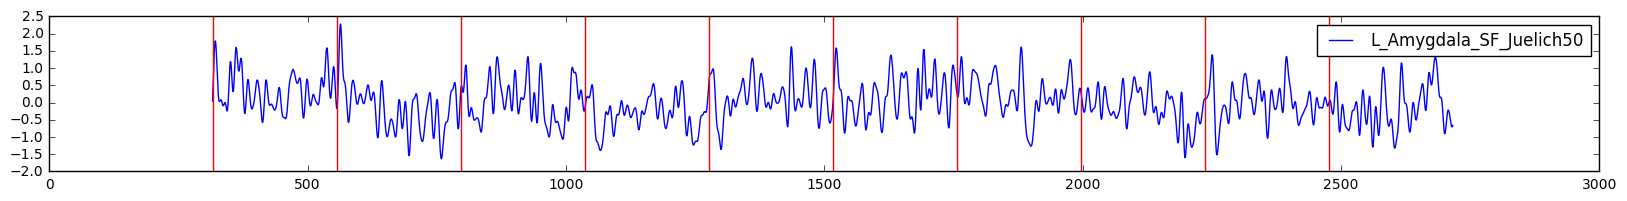

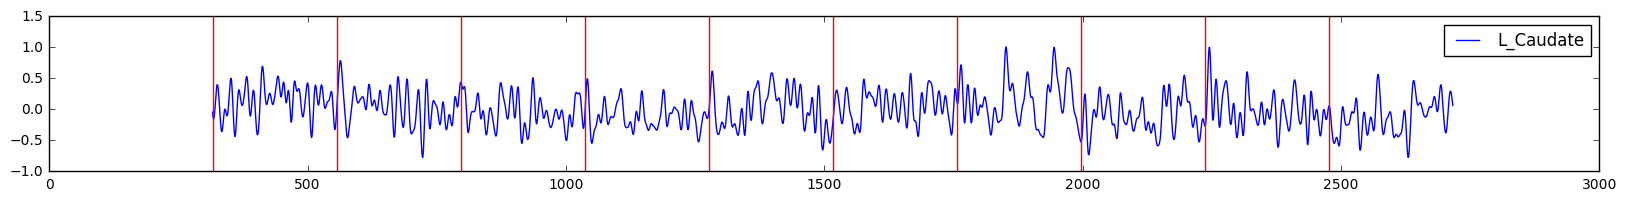

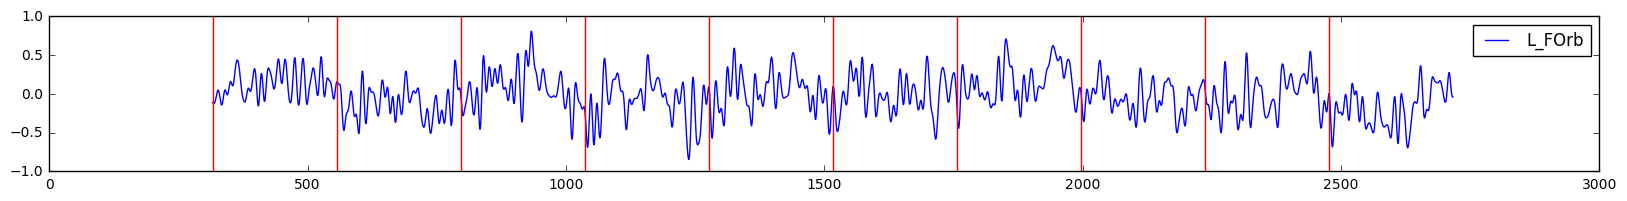

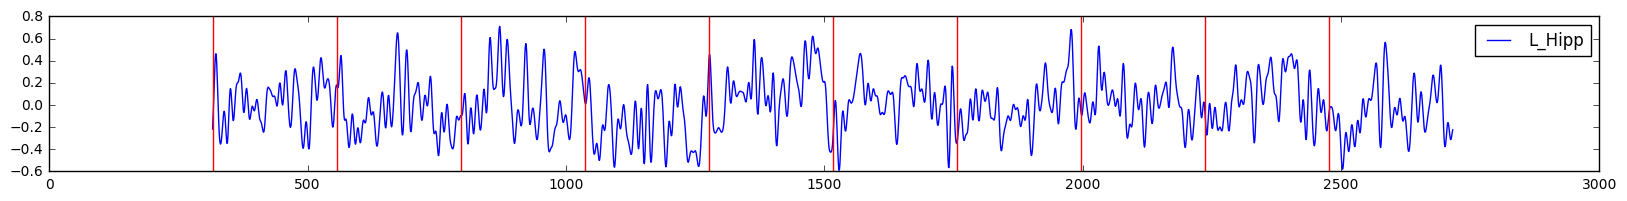

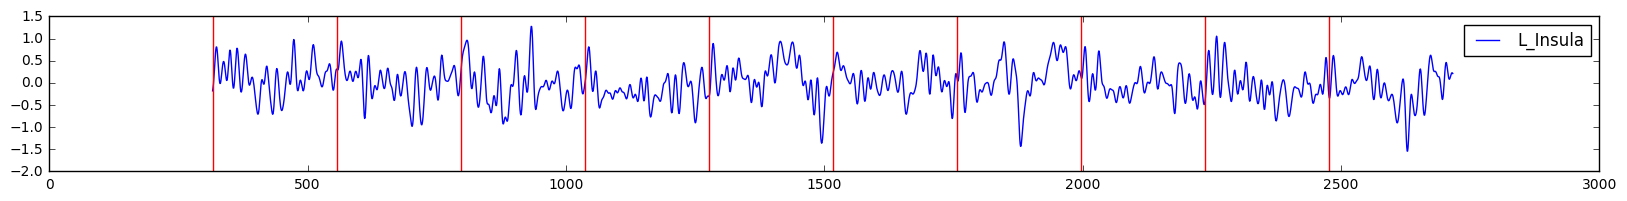

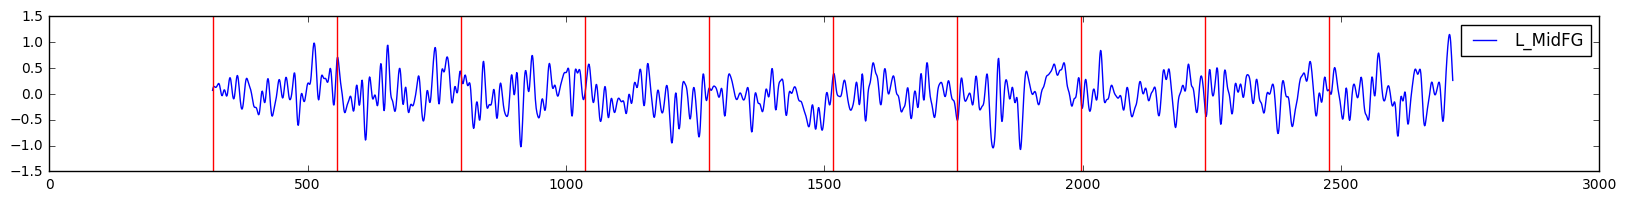

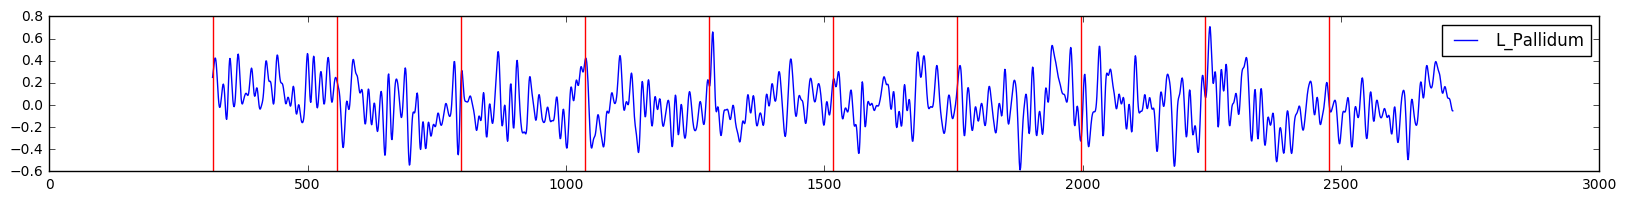

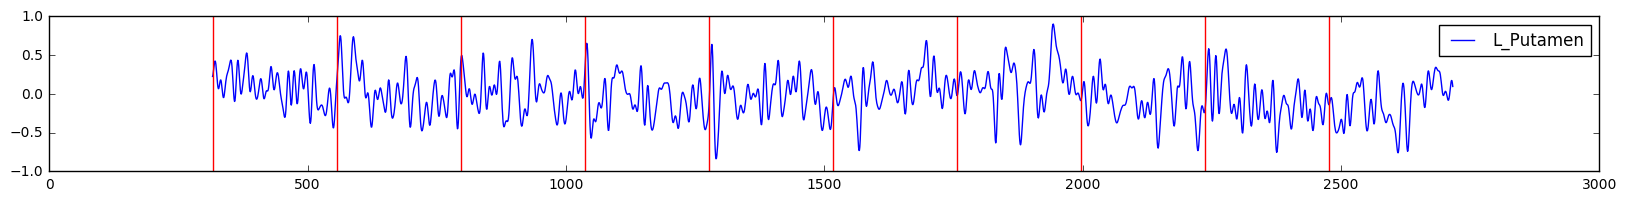

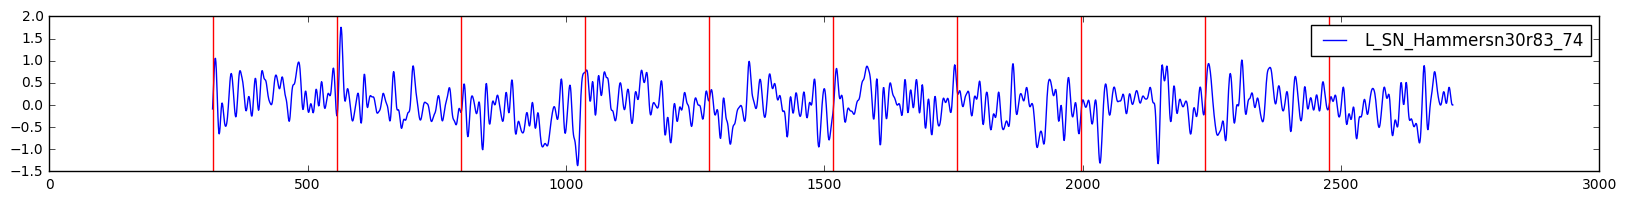

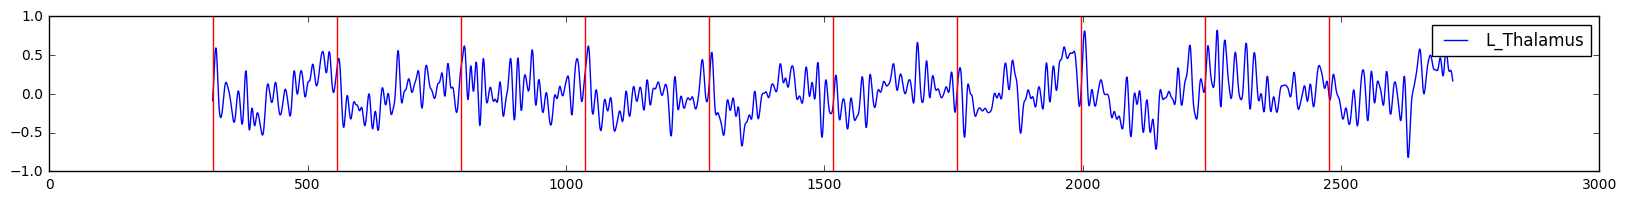

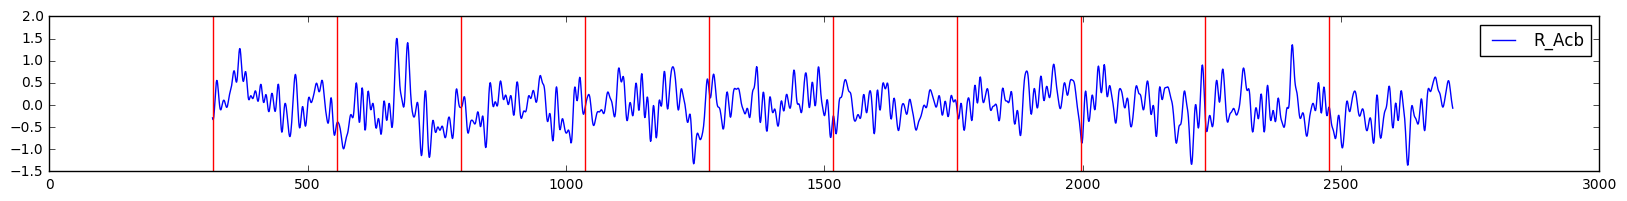

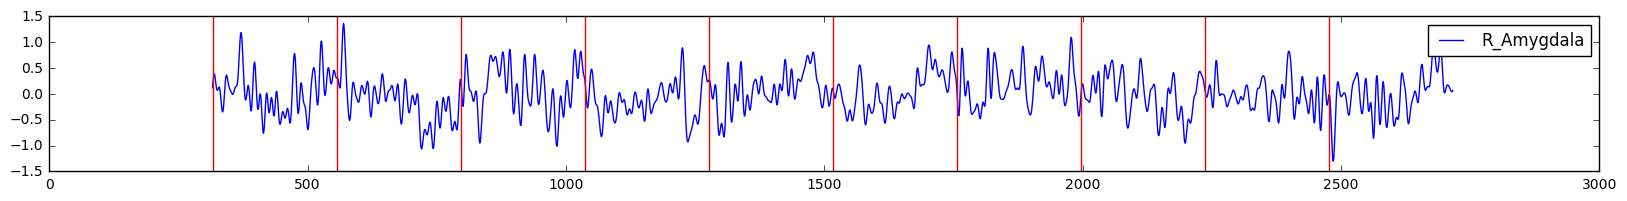

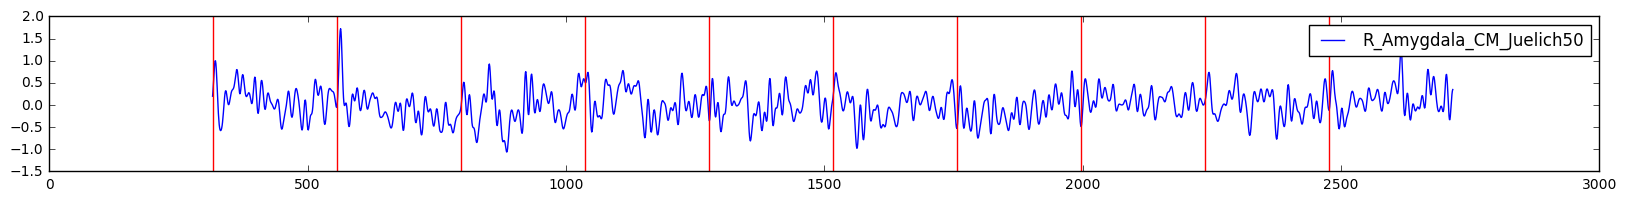

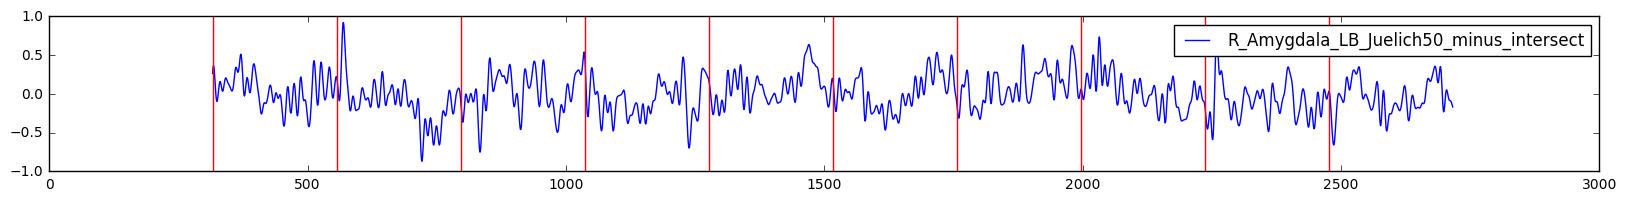

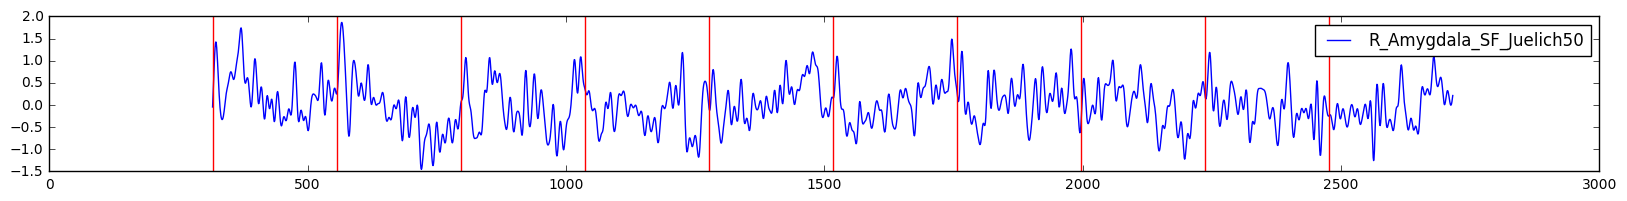

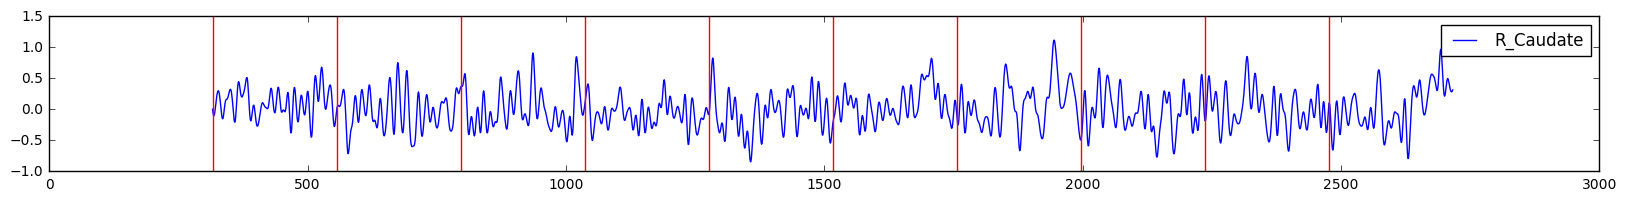

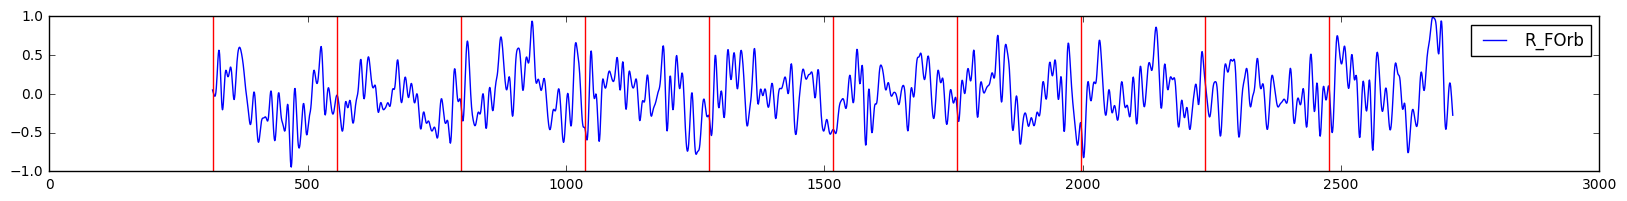

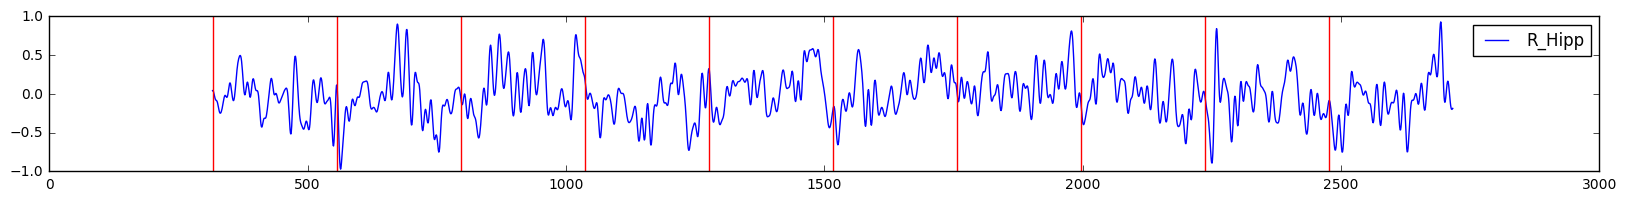

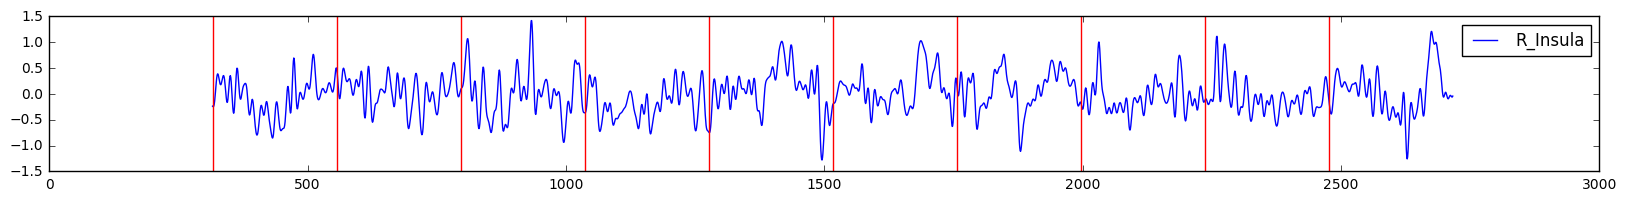

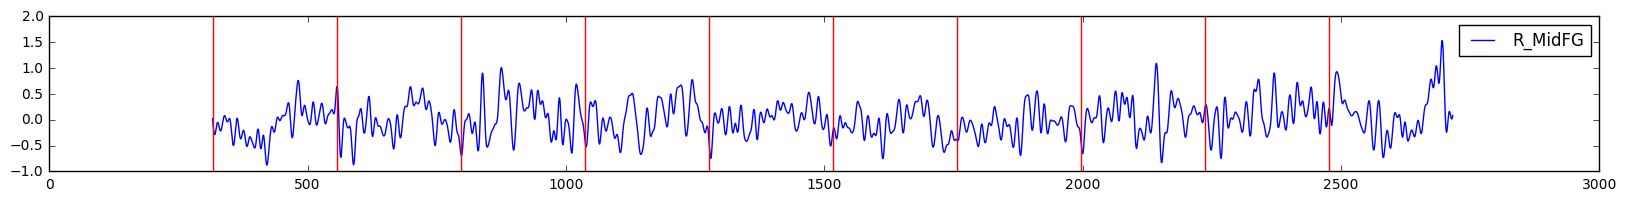

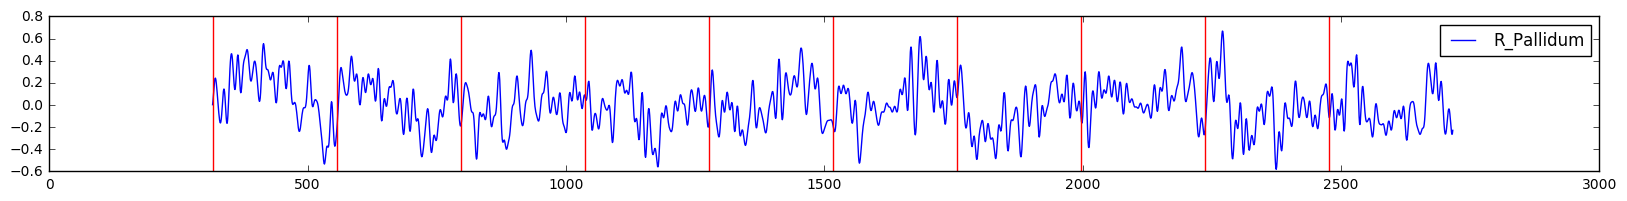

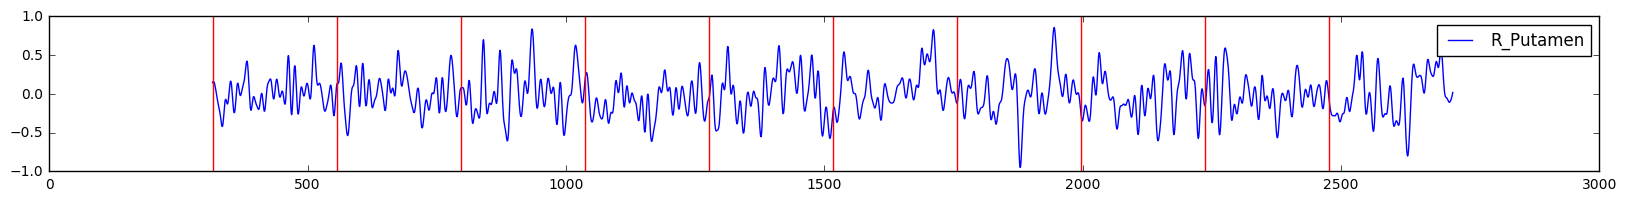

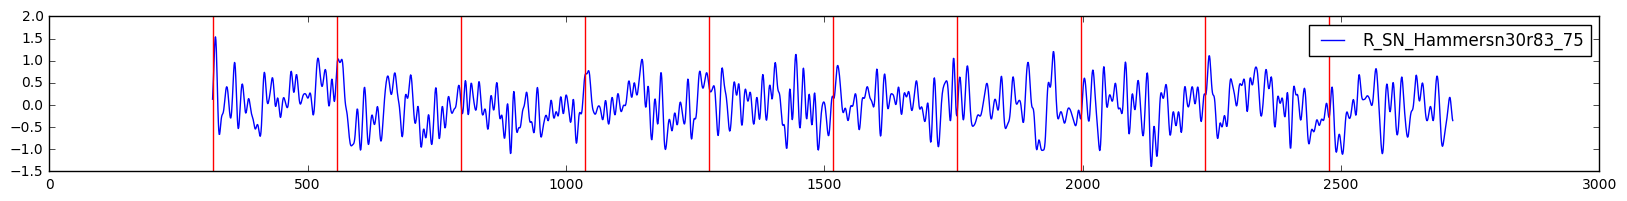

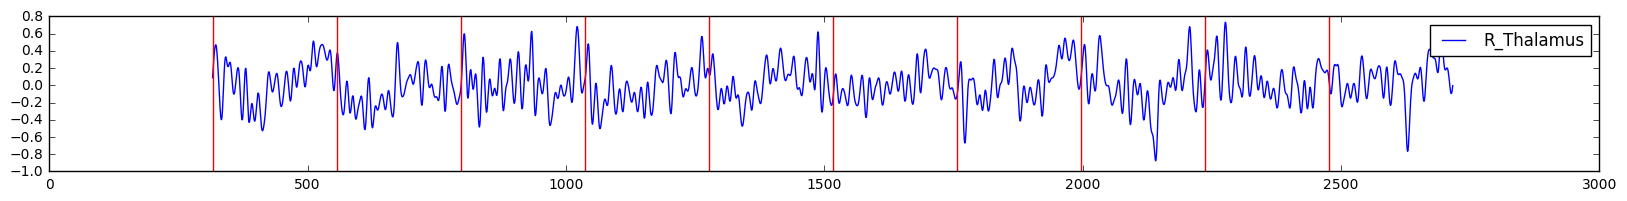

In [20]:
# comment about the indexing:
# the puffs start at second 316 and then happen every 4min = 240sec
# 316/0.802 = 394
# 2400/0.802 = 2992.52
data_filtered_low = None
for trace,name in zip(data,roinames):
    trace_filtered_low = butter_lowpass_filter(trace,0.1,sampling_freq,order=5)
    plt.figure(figsize=(20,2))
    plt.plot(t[394:394+2994],trace_filtered_low[394:394+2994],label=name[0])
#    plt.xlim((0,1000))
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()
    if data_filtered_low is None:
        data_filtered_low = trace_filtered_low
    else:
        data_filtered_low = np.vstack((data_filtered_low,trace_filtered_low))

In [21]:
def pearson_combined(data):
    results = None
    for perm in itertools.combinations(range(data.shape[0]),2):
        pc=pearsonr(data[perm[0]],data[perm[1]])
        result=np.array([perm[0],perm[1],pc[0],pc[1]])
        if results is None:
            results = result
        else:
            results = np.vstack((results,result))
    return results
results_array = pearson_combined(data_filtered)

In [22]:
sorted_results=results_array[results_array[:,2].argsort()[::-1]]

In [23]:
for i,j,pr,pp in sorted_results:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.897987599514 0.0
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.792896776188 0.0
14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.78042463093 0.0
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.777353227783 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.769029288019 0.0
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.768740394529 0.0
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.710689294977 0.0
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.696609156808 0.0
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.661524631257 0.0
0.0 28.0 ['ACC'] ['R_Thalamus'] 0.64837881558 0.0
1.0 15.0 ['L_Acb'] ['R_Acb'] 0.612347199285 0.0
0.0 14.0 ['ACC'] ['L_Thalamus'] 0.58731562227 0.0
0.0 23.0 ['ACC'] ['R_Insula'] 0.58086851679 0.0
0.0 9.0 ['ACC'] ['L_Insula'] 0.578434894861 0.0
17.0 19.0 ['R_Amygdala_CM_Juelich50'] ['R_Amygdala_SF_Juelich50'] 0.563331417547 0.0
6.0 12.0 ['L_Caudate'] ['L_Putamen'] 0.552153520042 2.17189265152e-309
4.0 5.0 [

In [24]:
def sliding_window_pearson(data1,data2,window_size,step=1):
    pr = [pearsonr(data1[index:index+window_size],data2[index:index+window_size])[0]
          for index in range(0,min(data1.size,data2.size),step)]
    pr = np.array(pr)
    return pr

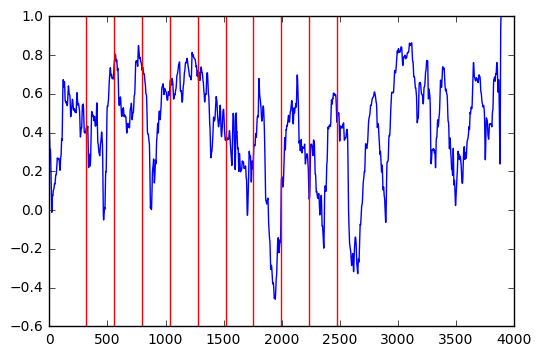

In [25]:
plt.plot(sliding_window_pearson(data_filtered[15],data_filtered[22],100))
for p in puffs:
    plt.axvline(x=p,color="r")


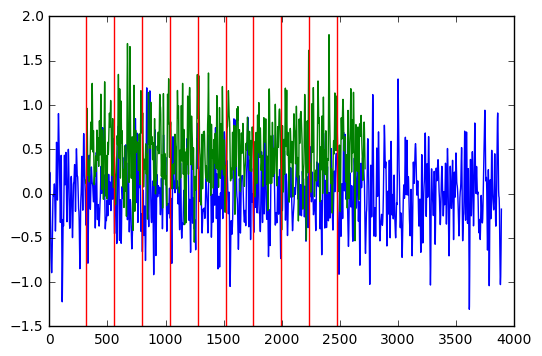

In [26]:
# new strategy:
# we compare pearson correlations of the puffs to r's from time where there is no delivery
# two time series: puffs from first puff to 2min after last puff
# nopuffs - the rest
plt.plot(range(data_filtered[15].size),data_filtered[15])
plt.plot(t[394:394+2994],data_filtered[15][394:394+2994]+0.5)
for p in puffs:
    plt.axvline(x=p,color="r")



In [27]:
data_puffs = data_filtered[:,394:394+2994]
data_nopuffs1=data_filtered[:,:394]
data_nopuffs2=data_filtered[:,394+2994:]
data_nopuffs=np.hstack((data_nopuffs1,data_nopuffs2))
print(data_puffs.shape, data_nopuffs.shape)
print(data_puffs.shape[1]+data_nopuffs.shape[1])

(29, 2994) (29, 896)
3890


In [28]:
results_puffs = pearson_combined(data_puffs)
sorted_results_puffs=results_puffs[results_puffs[:,2].argsort()[::-1]]
for i,j,pr,pp in sorted_results_puffs:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.905386690577 0.0
14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.808687220414 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.793999856814 0.0
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.783385278591 0.0
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.762322129411 0.0
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.756294769562 0.0
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.730542107104 0.0
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.730461203893 0.0
0.0 28.0 ['ACC'] ['R_Thalamus'] 0.646795113092 0.0
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.636593716092 0.0
1.0 15.0 ['L_Acb'] ['R_Acb'] 0.628023198138 0.0
0.0 14.0 ['ACC'] ['L_Thalamus'] 0.607955064108 3.94457012133e-302
4.0 5.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['L_Amygdala_SF_Juelich50'] 0.582535278869 1.19728356313e-271
0.0 23.0 ['ACC'] ['R_Insula'] 0.580474537872 2.70653444072e-269
0.0 9.0 ['ACC'] ['L_Insula'] 0.577254653698 1.19487520262e-265
18

In [29]:
results_nopuffs = pearson_combined(data_nopuffs)
sorted_results_nopuffs=results_nopuffs[results_nopuffs[:,2].argsort()[::-1]]
for i,j,pr,pp in sorted_results_nopuffs:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

9.0 23.0 ['L_Insula'] ['R_Insula'] 0.879117919017 5.69108748769e-290
2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.865970787302 2.76127897588e-271
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.817034192996 5.34977385957e-216
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.758780732692 1.24013232176e-168
8.0 22.0 ['L_Hipp'] ['R_Hipp'] 0.750461202573 5.75877422031e-163
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.702749322142 2.44985136294e-134
14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.689789590465 1.57936581658e-127
11.0 12.0 ['L_Pallidum'] ['L_Putamen'] 0.662025242743 4.374584291e-114
0.0 28.0 ['ACC'] ['R_Thalamus'] 0.655814491055 2.83944459401e-111
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.645245009624 1.22705512151e-106
9.0 12.0 ['L_Insula'] ['L_Putamen'] 0.60017507945 8.82502822302e-89
23.0 26.0 ['R_Insula'] ['R_Putamen'] 0.596071102492 2.70786276716e-87
0.0 9.0 ['ACC'] ['L_Insula'] 0.588749395147 1.07820465549e-84
0.0 23.0 ['ACC'] ['R_Insula'] 0.58787

In [30]:
print(results_puffs.shape)

(406, 4)


In [31]:
results_diffp = results_puffs[:,2]-results_nopuffs[:,2]
results_diff = np.vstack((results_puffs.T,results_diffp)).T
print(results_diff.shape)

(406, 5)


In [32]:
sorted_results_diff=results_diff[results_diff[:,4].argsort()[::-1]]
for i,j,pr,pp,pd in sorted_results_diff:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp,pd)

25.0 28.0 ['R_Pallidum'] ['R_Thalamus'] 0.155563965373 1.12209393284e-17 0.279002813864
4.0 17.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['R_Amygdala_CM_Juelich50'] 0.228163831581 1.16974802759e-36 0.27118341609
4.0 18.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.32283265379 1.40047645217e-73 0.2502635434
7.0 27.0 ['L_FOrb'] ['R_SN_Hammersn30r83_75'] -0.0657554304336 0.000317771701414 0.245138268417
10.0 27.0 ['L_MidFG'] ['R_SN_Hammersn30r83_75'] 0.055584703595 0.00234593904001 0.241998099394
2.0 17.0 ['L_Amygdala'] ['R_Amygdala_CM_Juelich50'] 0.208945405038 6.88709228753e-31 0.23820663982
5.0 17.0 ['L_Amygdala_SF_Juelich50'] ['R_Amygdala_CM_Juelich50'] 0.26544952757 1.83944936503e-49 0.234438123211
14.0 17.0 ['L_Thalamus'] ['R_Amygdala_CM_Juelich50'] 0.211218466947 1.52844082578e-31 0.232343400228
18.0 21.0 ['R_Amygdala_LB_Juelich50_minus_intersect'] ['R_FOrb'] 0.316459590261 1.26827855309e-70 0.224927284874
4.0 8.0 ['L_Amygdala_LB_Ju

In [33]:
# now we want to look at the unfiltered data and look at the powerspectrum
data_puffs_nofilter = data[:,394:394+2994]

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


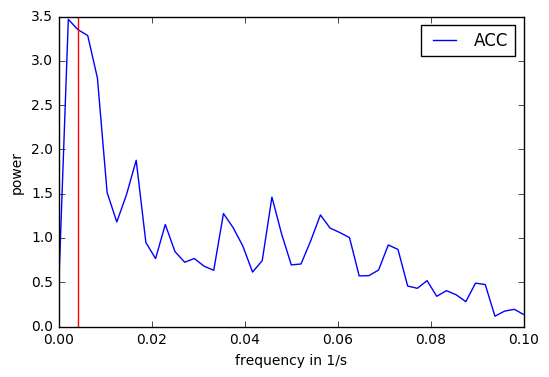

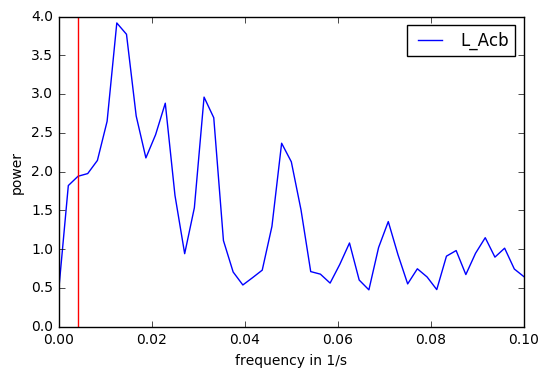

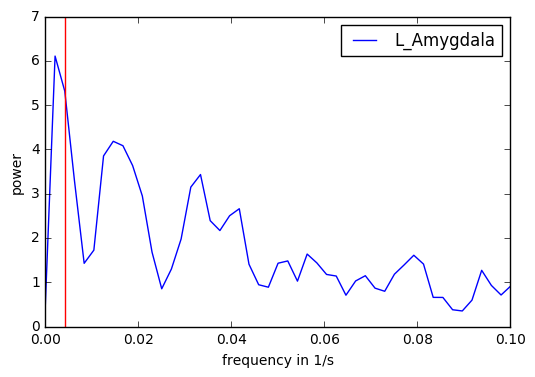

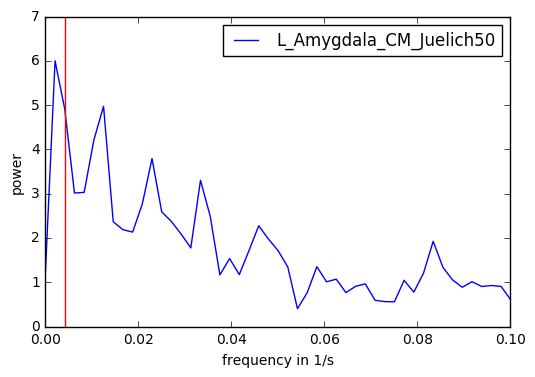

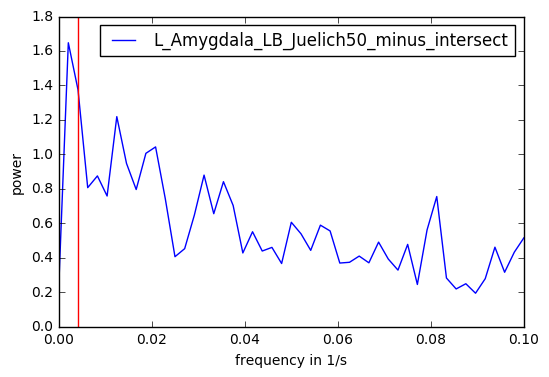

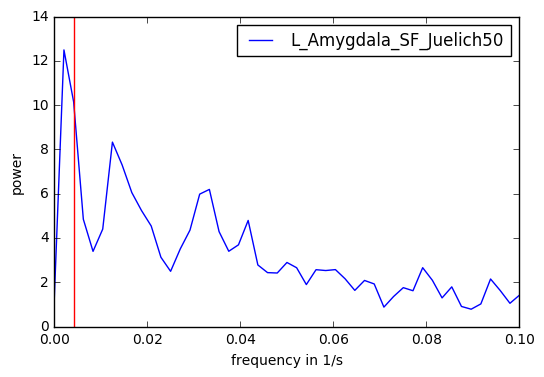

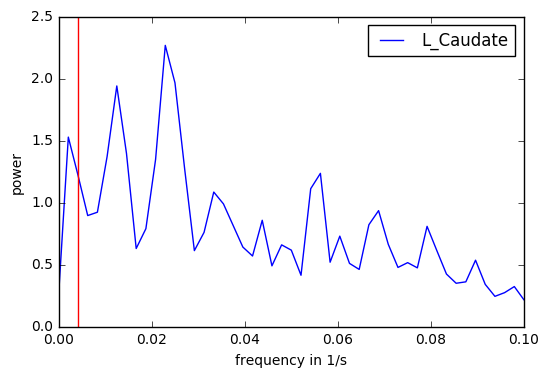

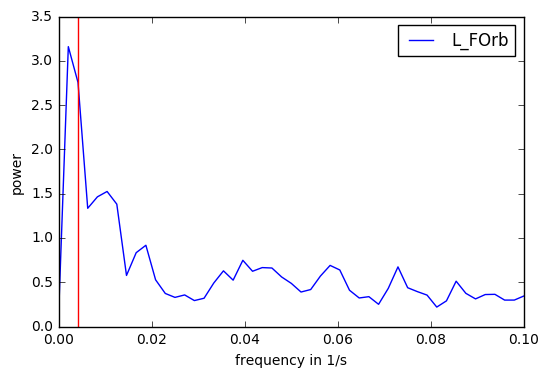

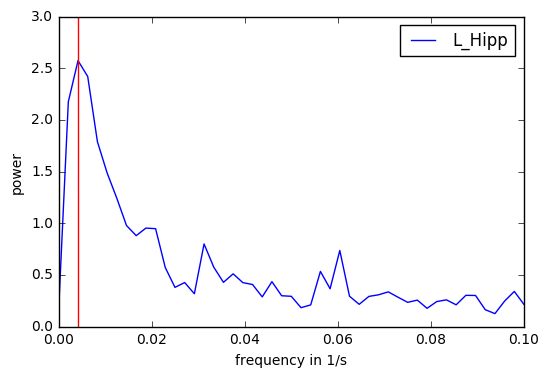

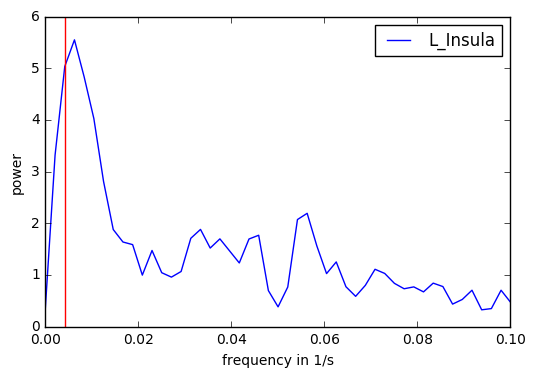

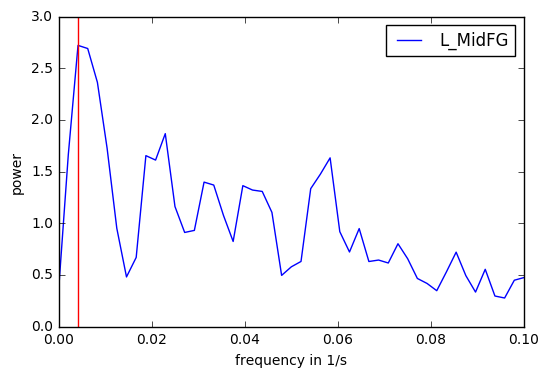

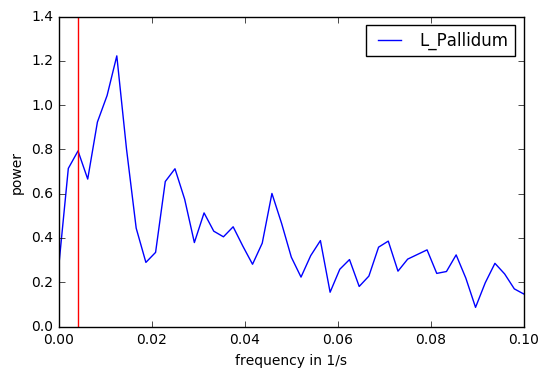

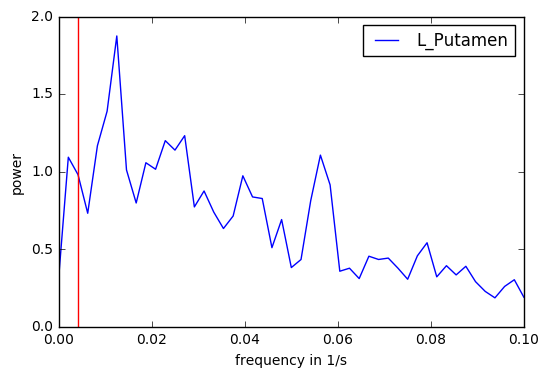

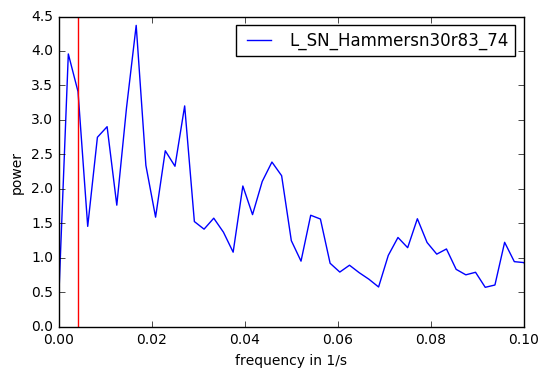

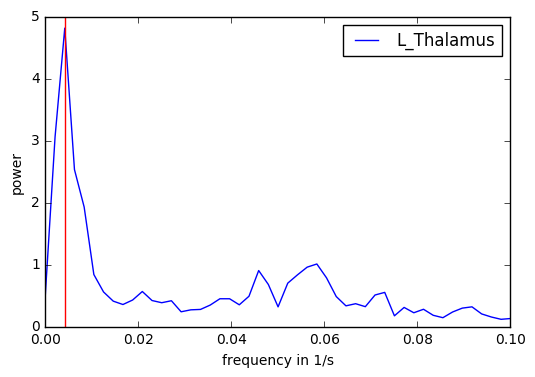

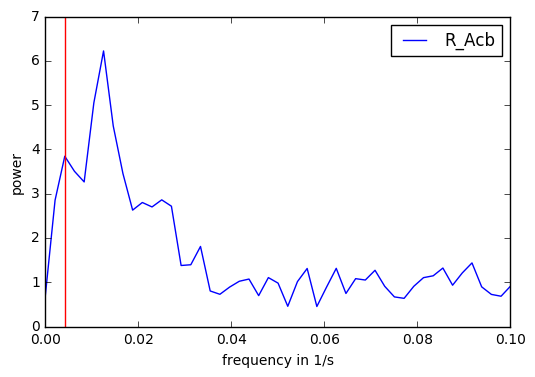

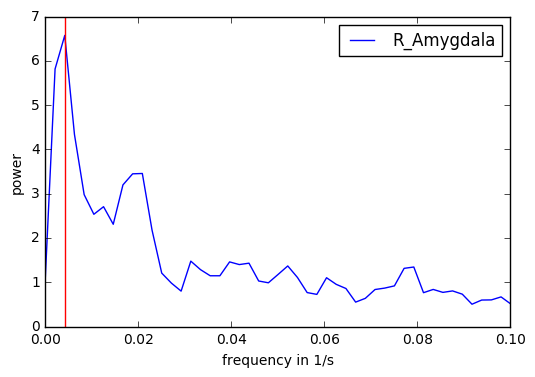

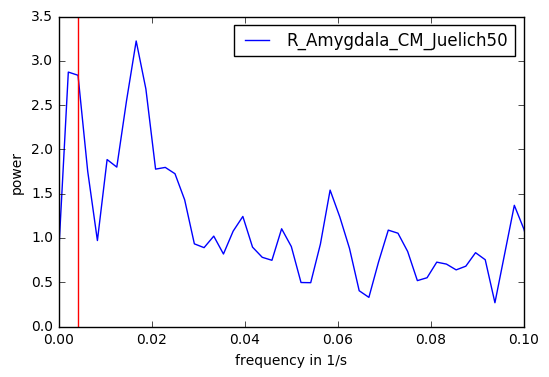

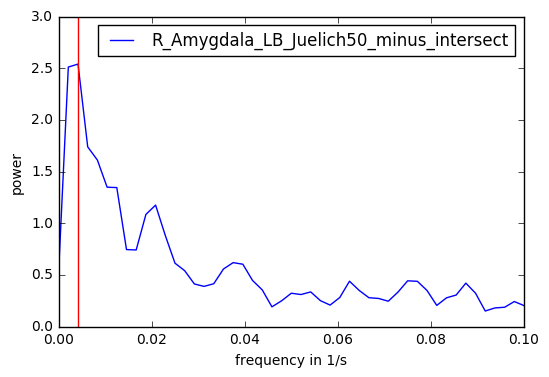

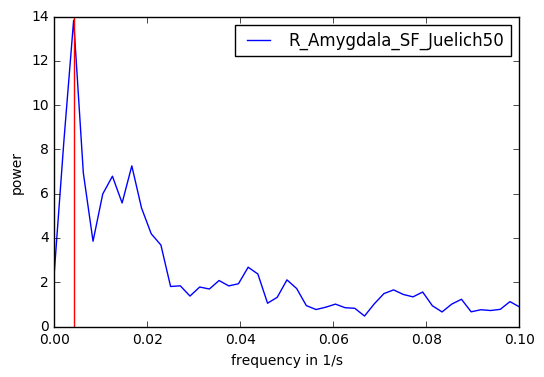

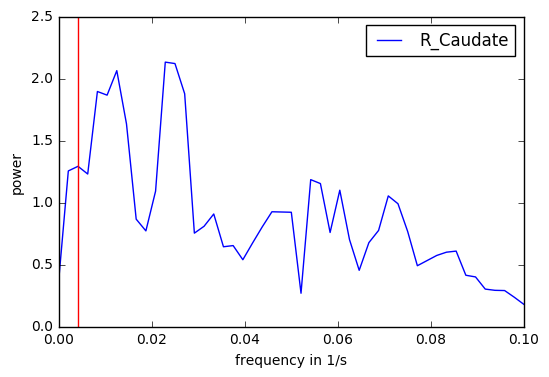

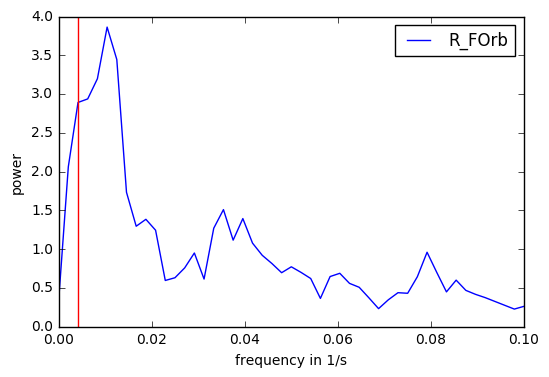

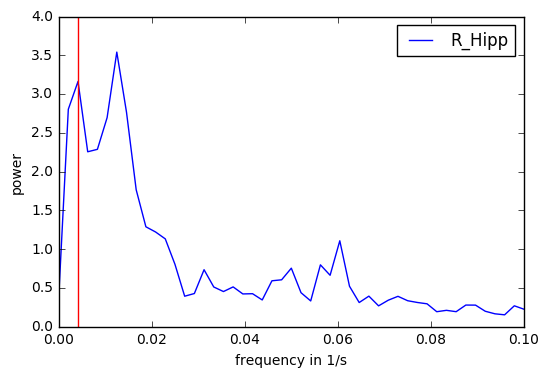

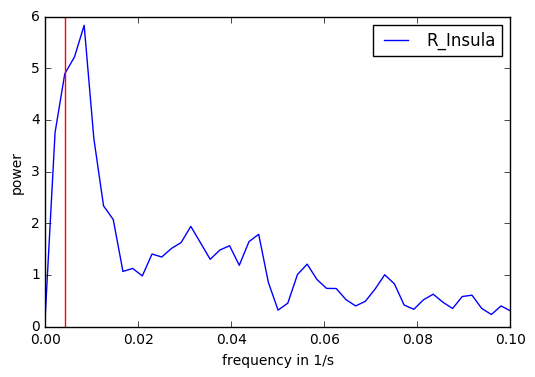

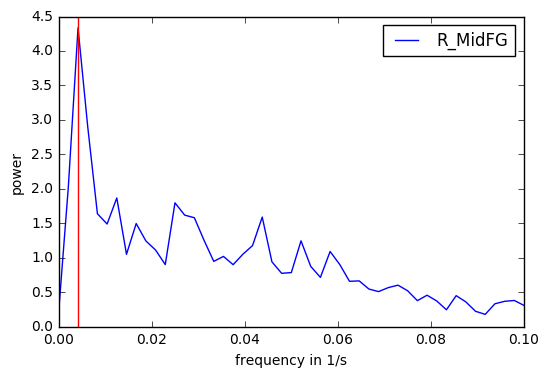

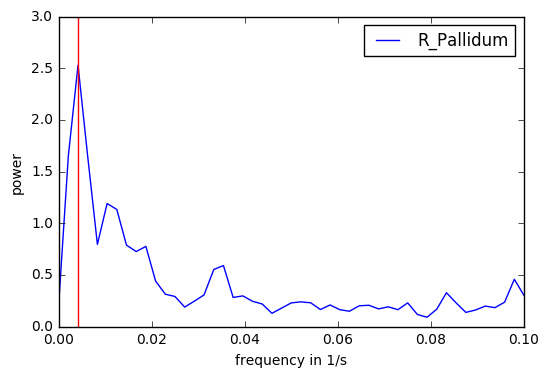

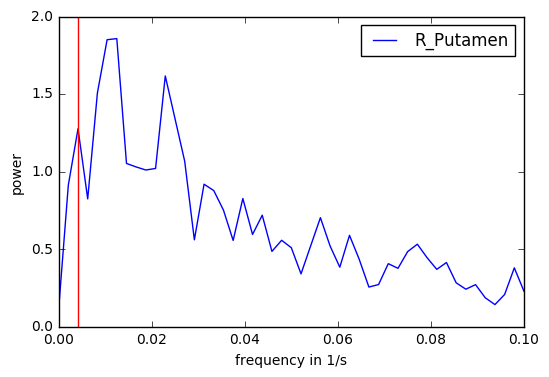

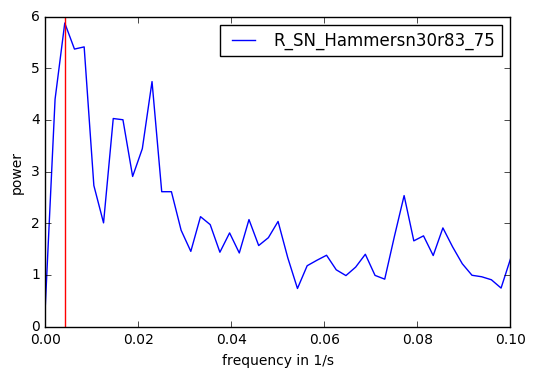

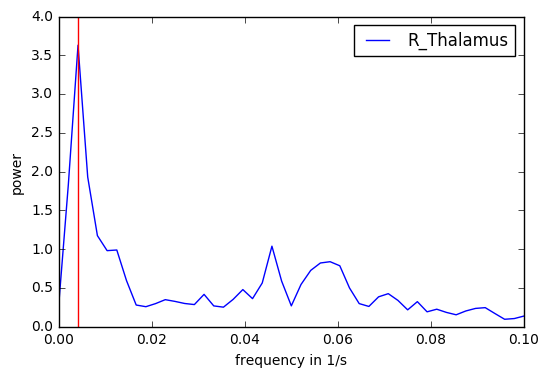

In [34]:
powerspectra = None
for region,roiname in zip(data_puffs_nofilter,roinames):
    f,ps = welch(region,fs=1/0.802,nperseg=598)
    plt.figure()
    plt.plot(f,ps,label=roiname[0])
    plt.xlim((0,0.1))
    plt.xlabel("frequency in 1/s")
    plt.ylabel("power")
    plt.axvline(x=1/240.0,color="r")
    plt.legend()
    if powerspectra is None:
        powerspectra  = ps
    else:
        powerspectra = np.vstack((powerspectra,ps))


In [35]:
print(f)

[ 0.          0.00208509  0.00417018  0.00625526  0.00834035  0.01042544
  0.01251053  0.01459562  0.01668071  0.01876579  0.02085088  0.02293597
  0.02502106  0.02710615  0.02919124  0.03127632  0.03336141  0.0354465
  0.03753159  0.03961668  0.04170177  0.04378685  0.04587194  0.04795703
  0.05004212  0.05212721  0.0542123   0.05629738  0.05838247  0.06046756
  0.06255265  0.06463774  0.06672283  0.06880791  0.070893    0.07297809
  0.07506318  0.07714827  0.07923335  0.08131844  0.08340353  0.08548862
  0.08757371  0.0896588   0.09174388  0.09382897  0.09591406  0.09799915
  0.10008424  0.10216933  0.10425441  0.1063395   0.10842459  0.11050968
  0.11259477  0.11467986  0.11676494  0.11885003  0.12093512  0.12302021
  0.1251053   0.12719039  0.12927547  0.13136056  0.13344565  0.13553074
  0.13761583  0.13970091  0.141786    0.14387109  0.14595618  0.14804127
  0.15012636  0.15221144  0.15429653  0.15638162  0.15846671  0.1605518
  0.16263689  0.16472197  0.16680706  0.16889215  0.1

In [36]:
totalpower=np.mean(powerspectra,axis=1)
print(totalpower.shape)
print(powerspectra.shape)
scaled_PS = np.divide(powerspectra.T,totalpower).T
print(scaled_PS.shape)

sorted_PS =scaled_PS[scaled_PS[:,2].argsort()[::-1]]
sorted_roinames = roinames[scaled_PS[:,2].argsort()[::-1]]
print(sorted_PS.shape)

(29,)
(29, 300)
(29, 300)
(29, 300)


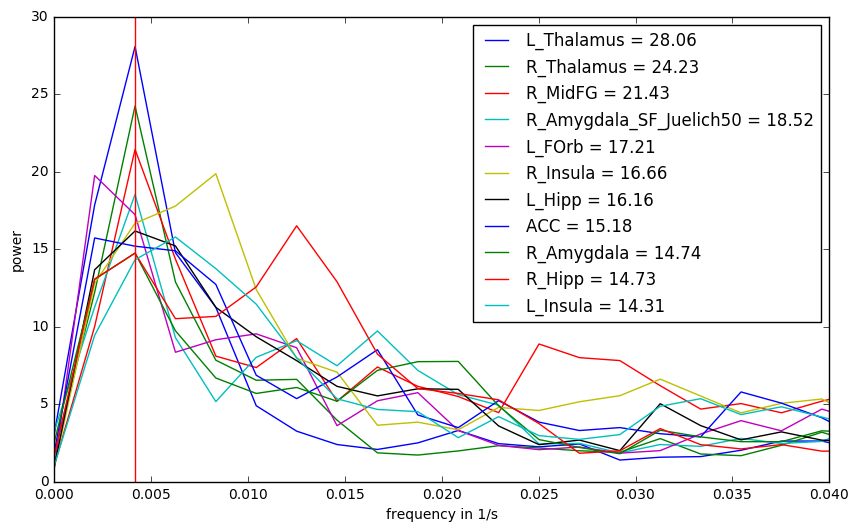

In [37]:
plt.figure(figsize=(10,6))
for spectra,roiname in zip(sorted_PS,sorted_roinames):
    if spectra[2] > 14:
        rel_strength = '{:2.2f}'.format(spectra[2])
        plt.plot(f,spectra,label=roiname[0]+" = "+rel_strength)
        plt.xlim((0,0.04))
    
plt.xlabel("frequency in 1/s")
plt.ylabel("power")
plt.axvline(x=1/240.0,color="r")
plt.legend()



In [38]:
for puff,pufftotal,roiname in zip(powerspectra.T[2],totalpower,roinames):
    print(puff,puff/pufftotal,roiname[0])

3.3506429741 15.1810244141 ACC
1.9385562586 3.42072889754 L_Acb
5.31517022159 8.84121058246 L_Amygdala
4.90638808901 5.91219559 L_Amygdala_CM_Juelich50
1.37428410264 6.44027869154 L_Amygdala_LB_Juelich50_minus_intersect
10.1437551847 9.32795169432 L_Amygdala_SF_Juelich50
1.21901915744 5.10219690573 L_Caudate
2.7547955296 17.2117324587 L_FOrb
2.57308622712 16.1615798258 L_Hipp
5.03249663641 14.30655726 L_Insula
2.72047770872 11.838016221 L_MidFG
0.792828678295 4.1301290795 L_Pallidum
0.979573058709 4.96918748978 L_Putamen
3.40979466976 4.26283218652 L_SN_Hammersn30r83_74
4.81211036347 28.0625358803 L_Thalamus
3.84438621176 5.30274109329 R_Acb
6.5733634843 14.7384951033 R_Amygdala
2.83653597228 4.14156404179 R_Amygdala_CM_Juelich50
2.53958434008 12.2276178061 R_Amygdala_LB_Juelich50_minus_intersect
13.8334524903 18.5201071172 R_Amygdala_SF_Juelich50
1.29178879449 5.40495584003 R_Caudate
2.89090672017 13.2041159476 R_FOrb
3.16152579458 14.7308185693 R_Hipp
4.89062141426 16.658921041 R_Ins

In [39]:
for puff,roiname in zip(sorted_PS.T[2],sorted_roinames):
    print(puff,roiname[0])

28.0625358803 L_Thalamus
24.2282944791 R_Thalamus
21.4258133125 R_MidFG
18.5201071172 R_Amygdala_SF_Juelich50
17.2117324587 L_FOrb
16.658921041 R_Insula
16.1615798258 L_Hipp
15.1810244141 ACC
14.7384951033 R_Amygdala
14.7308185693 R_Hipp
14.30655726 L_Insula
13.2041159476 R_FOrb
12.8715287618 R_Pallidum
12.2276178061 R_Amygdala_LB_Juelich50_minus_intersect
11.838016221 L_MidFG
9.32795169432 L_Amygdala_SF_Juelich50
8.84121058246 L_Amygdala
6.75693805428 R_Putamen
6.44027869154 L_Amygdala_LB_Juelich50_minus_intersect
5.91219559 L_Amygdala_CM_Juelich50
5.70081573921 R_SN_Hammersn30r83_75
5.40495584003 R_Caudate
5.30274109329 R_Acb
5.10219690573 L_Caudate
4.96918748978 L_Putamen
4.26283218652 L_SN_Hammersn30r83_74
4.14156404179 R_Amygdala_CM_Juelich50
4.1301290795 L_Pallidum
3.42072889754 L_Acb
